In [1]:
import pandas as pd
import datatable
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
pd.set_option("display.max_columns", None)

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error

def adjusted_r2(model, x, y):
    yhat = model.predict(x)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
    return adjusted_r_squared

def get_metric(model, X_train, y_train, X_test, y_test):
    print('Train set Adjusted R^2: {}'.format(adjusted_r2(model, X_train, y_train)))
    print("Train set Multiple Correlation: {}".format(np.power(model.score(X_train, y_train), 1/2)))
    print('Validation set Adjusted R^2: {}'.format(adjusted_r2(model, X_test, y_test)))
    print("Validation set Multiple Correlation: {}".format(np.power(model.score(X_test, y_test), 1/2)))
    print('Train set SEE: {}'.format(np.std(model.predict(X_train) - y_train)))
    print('Validation set SEE: {}'.format(np.std(model.predict(X_test) - y_test)))
    print('MSE Train set score: {}'.format(mean_squared_error(model.predict(X_train), y_train)))
    print('MSE Validation set score: {}'.format(mean_squared_error(model.predict(X_test), y_test)))
    return None

In [3]:
DATA_PATH = '../Data/'
df_source = datatable.fread(os.path.join(DATA_PATH, 'pred_final.csv')
                            , encoding='utf-8-sig', na_strings=['', 'NA']).to_pandas()
print(df_source.shape)
df_source.head()

(8620, 35)


,sm_date,hpcid,cdw_no,gend_cd,age,percentage_fat,height,weight,bmi,phy_active,resting_heart_rate,VO2max,muscle_mass,waist_hip_ratio,ecw/tbw,muscle_mass(RA),muscle_mass(LA),muscle_mass(BODY),muscle_mass(RL),muscle_mass(LL),fat_mass,tbw,lean_body_mass,sbp,dbp,alc_ys,current_smk,max_heart_rate,phy_new,mbp,limb_muscle_mass,CRF(METs),death_date,surv_years,death
0,2014-04-10,293E4800393912,F1F7E4E13501,False,55,30.3,156.2,58.4,23.9,0.0,70.0,23.45,38.4,0.85,0.339,2.04,2.05,18.22,6.38,6.19,17.7,30.0,40.7,104.0,72.0,True,0.0,161.0,1080.0,88.0,16.66,6.7,NaN,5.188334,False
1,2014-09-02,1F29531A3F251C,FB93B2E3876D,False,54,35.6,156.7,59.0,24.0,1.0,68.0,22.05,35.8,0.91,0.326,1.92,1.88,17.75,5.71,5.74,21.0,27.8,38.0,128.0,81.0,False,0.0,166.0,420.0,104.5,15.25,6.3,NaN,4.791337,False
2,2011-10-10,114A1C2E3F4D44,158F02FB30AB,False,52,26.2,167.2,51.7,18.5,0.0,69.0,25.90,35.9,0.84,0.338,1.74,1.62,16.83,6.40,6.36,13.6,28.0,38.1,92.0,67.0,False,0.0,135.0,1080.0,79.5,16.12,7.4,NaN,7.688043,False
3,2012-06-29,3D22284744071C,2E159F6A824B,False,55,31.4,159.5,61.8,24.3,0.0,58.0,25.55,40.1,0.90,0.339,2.33,2.23,19.69,6.30,6.25,19.4,31.3,42.4,124.0,72.0,True,0.0,119.0,525.0,98.0,17.11,7.3,NaN,6.967973,False
4,2012-11-05,295C261F44574E,1EB51FE0009F,False,58,31.2,164.9,65.6,24.1,0.0,64.0,28.35,42.6,0.89,0.338,2.32,2.27,20.23,7.24,7.30,20.4,33.2,45.2,124.0,74.0,False,0.0,162.0,630.0,99.0,19.13,8.1,NaN,6.614783,False


In [4]:
columns_to_use = ['cdw_no', 'sm_date', 'gend_cd', 'age', 'percentage_fat', 'bmi',
                  'phy_active', 'resting_heart_rate', 'VO2max', 'CRF(METs)','alc_ys',
                  'current_smk', 'surv_years', 'death']
df_source = df_source.loc[df_source['VO2max'].notnull(), columns_to_use]

In [5]:
df_source['visit_num'] = df_source.groupby(['cdw_no'])['sm_date'].apply(pd.Series.rank)
df_source.head()

,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,visit_num
0,F1F7E4E13501,2014-04-10,False,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False,1.0
1,FB93B2E3876D,2014-09-02,False,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False,1.0
2,158F02FB30AB,2011-10-10,False,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False,1.0
3,2E159F6A824B,2012-06-29,False,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False,1.0
4,1EB51FE0009F,2012-11-05,False,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False,1.0


In [6]:
df_selected = df_source[(df_source['visit_num'] == 1)]
df_selected = df_selected.drop(columns=['visit_num']).dropna().reset_index(drop=True)

#### Print Case num
print("Case(N) = {}".format(len(df_selected)))
print("Male Case(N) = {}".format(len(df_selected[df_selected['gend_cd'] == 1])))
print("Female Case(N) = {}".format(len(df_selected[df_selected['gend_cd'] == 0])))


df_selected.head()

Case(N) = 7747
Male Case(N) = 6386
Female Case(N) = 1361


,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death
0,F1F7E4E13501,2014-04-10,False,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False
1,FB93B2E3876D,2014-09-02,False,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False
2,158F02FB30AB,2011-10-10,False,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False
3,2E159F6A824B,2012-06-29,False,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False
4,1EB51FE0009F,2012-11-05,False,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False


In [7]:
from tableone import TableOne
columns = ['gend_cd', 'age', 'percentage_fat', 'bmi', 'phy_active', 'resting_heart_rate', 'VO2max', 'CRF(METs)', 'alc_ys', 'current_smk', 'death']

categorical = ['gend_cd', 'phy_active', 'alc_ys', 'current_smk', 'death']

group_by = 'gend_cd'

TableOne(data=df_selected, columns=columns, categorical=categorical, groupby=group_by, pval=True)


Grouped by gend_cd                                                 
                                               Missing      Overall         False          True P-Value
n                                                              7747          1361          6386        
gend_cd, n (%)                False                  0  1361 (17.6)  1361 (100.0)                <0.001
                              True                      6386 (82.4)                6386 (100.0)        
age, mean (SD)                                       0   49.3 (7.2)    52.2 (5.7)    48.6 (7.4)  <0.001
percentage_fat, mean (SD)                            0   23.5 (5.4)    29.4 (5.3)    22.2 (4.5)  <0.001
bmi, mean (SD)                                       0   24.0 (2.6)    22.1 (2.3)    24.3 (2.4)  <0.001
phy_active, n (%)             0.0                    0  6720 (86.7)   1218 (89.5)   5502 (86.2)   0.001
                              1.0                       1027 (13.3)    143 (10.5)    884 (13.8)        
resting_heart_rate, mean (SD)                        0   61.9 (7.7)    61.5 (7.2)    62.0 (7.7)   0.024
VO2max, mean (SD)                                    0   31.8 (4.6)    26.1 (2.9)    33.1 (3.9)  <0.001
CRF(METs), mean (SD)                                 0    9.1 (1.3)     7.4 (0.8)     9.4 (1.1)  <0.001
alc_ys, n (%)                 False                  0  1576 (20.3)    764 (56.1)    812 (12.7)  <0.001
                              True                      6171 (79.7)    597 (43.9)   5574 (87.3)        
current_smk, n (%)            0.0                    0  5035 (65.0)   1324 (97.3)   3711 (58.1)  <0.001
                              1.0                       2712 (35.0)      37 (2.7)   2675 (41.9)        
death, n (%)                  False                  0  7719 (99.6)   1358 (99.8)   6361 (99.6)   0.459
                              True                         28 (0.4)       3 (0.2)      25 (0.4)

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


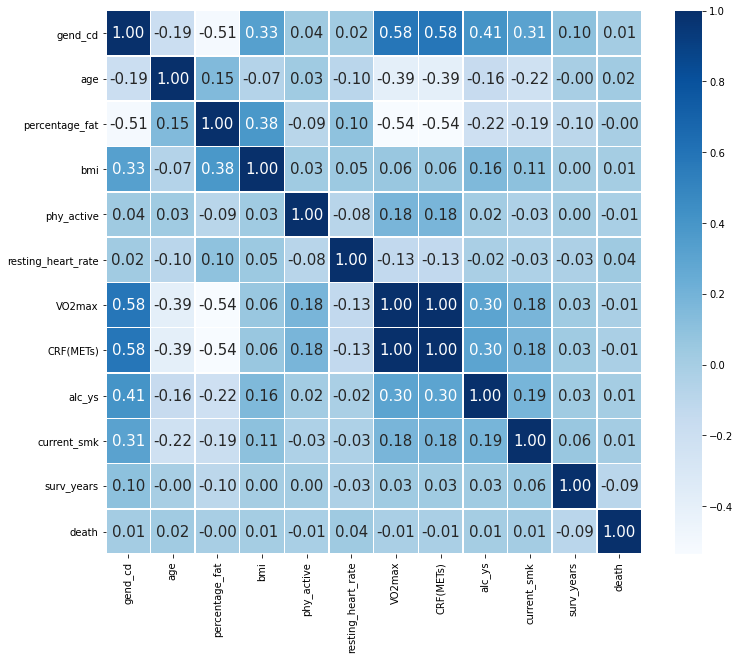

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues', annot_kws={'size':15})
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
#### Male
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(columns=['VO2max']),
                                                    df_selected['VO2max'], random_state=1004,
                                                    test_size=0.2)
print("Train set size = {}".format(len(X_train)))
print("Test set size = {}".format(len(X_test)))

Train set size = 6197
Test set size = 1550


/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
X_train.head()

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,CRF(METs),alc_ys,current_smk,surv_years,death
1176,D317C4C7D181,2015-10-08,False,50,26.3,19.4,0.0,66.0,8.0,True,0.0,3.693437,False
1242,0E42D3270C6B,2012-06-08,False,55,31.8,22.3,0.0,58.0,6.8,False,0.0,7.025469,False
1430,DBD3E347C5A1,2011-04-29,True,29,21.4,21.7,0.0,60.0,11.5,True,1.0,8.137060,False
870,ADB746358561,2013-06-12,False,44,30.8,22.3,0.0,60.0,8.0,False,0.0,6.015182,False
4601,EF3B626FCB15,2013-02-19,True,51,21.8,22.6,0.0,58.0,9.8,True,1.0,6.324565,False


#### Age, BMI, Resting_heart_Rate, Phy_Active

In [11]:
column_mask = ['age', 'gend_cd', 'bmi', 'resting_heart_rate', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABRP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABRP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.19426919  6.92507188 -0.27506915 -0.09521047  2.09385136]
47.93830539665908
Train set Adjusted R^2: 0.4937422740647254
Train set Multiple Correlation: 0.702958611865529
Validation set Adjusted R^2: 0.48789991797466614
Validation set Multiple Correlation: 0.6996805843927416
Train set SEE: 3.2513642051647125
Validation set SEE: 3.2342920172275544
MSE Train set score: 10.571369194626362
MSE Validation set score: 10.487744743135314


/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Age, BMI, Phy_Active

In [12]:
column_mask = ['age', 'gend_cd', 'bmi', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.18520132  6.93264903 -0.28724129  2.26369132]
41.86686582255096
Train set Adjusted R^2: 0.46862343759885416
Train set Multiple Correlation: 0.68481127510197
Validation set Adjusted R^2: 0.47005368246036283
Validation set Multiple Correlation: 0.6866018997605884
Train set SEE: 3.3313177397536986
Validation set SEE: 3.2905779770626027
MSE Train set score: 11.097677883197692
MSE Validation set score: 10.860262679712918


/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Age, BMI, Resting_heart_Rate

In [13]:
column_mask = ['age', 'gend_cd', 'bmi', 'resting_heart_rate']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['ABR_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['ABR_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

[-0.19081916  6.98191062 -0.2690141  -0.10256749]
48.30979588932645
Train set Adjusted R^2: 0.46981725046542566
Train set Multiple Correlation: 0.6856817954957561
Validation set Adjusted R^2: 0.4552012439600678
Validation set Multiple Correlation: 0.6757278178914732
Train set SEE: 3.327573496516891
Validation set SEE: 3.3371452612109787
MSE Train set score: 11.072745374721645
MSE Validation set score: 11.164635742056971


/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Age, Percentage_fat, Resting_heart_Rate, Phy_Active

In [14]:
column_mask = ['age', 'gend_cd', 'percentage_fat', 'resting_heart_rate', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APRP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APRP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-0.18271533  4.68161109 -0.23358212 -0.08073222  1.81942189]
47.24519996014952
Train set Adjusted R^2: 0.5273025470593782
Train set Multiple Correlation: 0.7264186126345363
Validation set Adjusted R^2: 0.5177804715267876
Validation set Multiple Correlation: 0.7206504163735296
Train set SEE: 3.141748520919255
Validation set SEE: 3.1395581754619926
MSE Train set score: 9.870583768698328
MSE Validation set score: 9.875794795385202


#### Age, Percentage_fat, Phy_Active

In [15]:
column_mask = ['age', 'gend_cd', 'percentage_fat', 'phy_active']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APP_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APP_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-0.17430628  4.54674829 -0.25061991  1.94275715]
42.332802527636474
Train set Adjusted R^2: 0.5095251657696245
Train set Multiple Correlation: 0.7140320759112927
Validation set Adjusted R^2: 0.5055128352488447
Validation set Multiple Correlation: 0.7118916736253204
Train set SEE: 3.2005397438591574
Validation set SEE: 3.179865408882107
MSE Train set score: 10.243454652022042
MSE Validation set score: 10.13359339088597


#### Age, Percentage_fat, Resting_heart_Rate

In [16]:
column_mask = ['age', 'gend_cd', 'percentage_fat', 'resting_heart_rate']
linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train[column_mask], y_train)

## male model results
print(linear_model.coef_)
print(linear_model.intercept_)

get_metric(linear_model, X_train=X_train[column_mask], X_test=X_test[column_mask],
           y_train=y_train, y_test=y_test)

df_selected['APR_VO2max'] = linear_model.predict(df_selected[column_mask])
df_selected['APR_CRF'] = linear_model.predict(df_selected[column_mask]) / 3.5

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-0.17925804  4.67369125 -0.24352558 -0.08626036]
47.898147643922755
Train set Adjusted R^2: 0.509344266958983
Train set Multiple Correlation: 0.7139054723167513
Validation set Adjusted R^2: 0.4921389040266845
Validation set Multiple Correlation: 0.7024602190920575
Train set SEE: 3.201129907123076
Validation set SEE: 3.2230904019258757
MSE Train set score: 10.247232682277794
MSE Validation set score: 10.407667200488788


In [17]:
df_selected.head()

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF
0,F1F7E4E13501,2014-04-10,False,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False,24.014614,6.861318,24.815726,7.090208,24.205580,6.915880,24.467063,6.990589,25.152174,7.186335,24.621905,7.034830
1,FB93B2E3876D,2014-09-02,False,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False,26.465649,7.561614,27.235895,7.781684,24.574633,7.021324,25.392680,7.255051,25.940952,7.411701,23.682998,6.766571
2,158F02FB30AB,2011-10-10,False,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False,26.178005,7.479430,26.922433,7.692124,26.333281,7.523795,26.053628,7.443894,26.702635,7.629324,26.244394,7.498398
3,2E159F6A824B,2012-06-29,False,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False,25.047112,7.156318,24.700830,7.057380,25.328784,7.236796,25.178909,7.193974,24.876492,7.107569,25.389151,7.254043
4,1EB51FE0009F,2012-11-05,False,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False,23.948055,6.842302,24.202674,6.915050,24.194725,6.912779,24.193087,6.912310,24.403697,6.972485,24.382520,6.966434


In [18]:
df_selected['CRF_tertile'] = pd.qcut(df_selected['CRF(METs)'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['CRF_tertile_nm'] = pd.qcut(df_selected['CRF(METs)'], q=3)

#### BMI
df_selected['ABRP_CRF_tertile'] = pd.qcut(df_selected['ABRP_CRF'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['ABRP_CRF_tertile_nm'] = pd.qcut(df_selected['ABRP_CRF'], q=3)

#### Percentage Fat
df_selected['APRP_CRF_tertile'] = pd.qcut(df_selected['APRP_CRF'], q=3, labels=['T1', 'T2', 'T3'])
df_selected['APRP_CRF_tertile_nm'] = pd.qcut(df_selected['APRP_CRF'], q=3)

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
df_selected['CRF_qualtile'] = pd.qcut(df_selected['CRF(METs)'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_selected['CRF_qualtile_nm'] = pd.qcut(df_selected['CRF(METs)'], q=4)

#### BMI
df_selected['ABRP_CRF_qualtile'] = pd.qcut(df_selected['ABRP_CRF'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_selected['ABRP_CRF_qualtile_nm'] = pd.qcut(df_selected['ABRP_CRF'], q=4)

#### Percentage Fat
df_selected['APRP_CRF_qualtile'] = pd.qcut(df_selected['APRP_CRF'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_selected['APRP_CRF_qualtile_nm'] = pd.qcut(df_selected['APRP_CRF'], q=4)

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
print(df_selected['age'].min())
print(df_selected['age'].max())

18
72


/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def age_split(x):
    if x < 40:
        return 'low'
    elif (x >= 40) & (x < 50):
        return 'middle'
    else: return 'high'

df_selected['age_split'] = df_selected['age'].apply(age_split)

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
df_selected['CRF_tertile_age_adj'] = df_selected.groupby(['age_split'])['CRF(METs)'].apply(lambda x: pd.qcut(x, q=3, labels=['T1', 'T2', 'T3']))
df_selected['ABRP_CRF_tertile_age_adj'] = df_selected.groupby(['age_split'])['ABRP_CRF'].apply(lambda x: pd.qcut(x, q=3, labels=['T1', 'T2', 'T3']))

df_selected.head()

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF,CRF_tertile,CRF_tertile_nm,ABRP_CRF_tertile,ABRP_CRF_tertile_nm,APRP_CRF_tertile,APRP_CRF_tertile_nm,CRF_qualtile,CRF_qualtile_nm,ABRP_CRF_qualtile,ABRP_CRF_qualtile_nm,APRP_CRF_qualtile,APRP_CRF_qualtile_nm,age_split,CRF_tertile_age_adj,ABRP_CRF_tertile_age_adj
0,F1F7E4E13501,2014-04-10,False,55,30.3,23.9,0.0,70.0,23.45,6.7,True,0.0,5.188334,False,24.014614,6.861318,24.815726,7.090208,24.205580,6.915880,24.467063,6.990589,25.152174,7.186335,24.621905,7.034830,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1
1,FB93B2E3876D,2014-09-02,False,54,35.6,24.0,1.0,68.0,22.05,6.3,False,0.0,4.791337,False,26.465649,7.561614,27.235895,7.781684,24.574633,7.021324,25.392680,7.255051,25.940952,7.411701,23.682998,6.766571,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1
2,158F02FB30AB,2011-10-10,False,52,26.2,18.5,0.0,69.0,25.90,7.4,False,0.0,7.688043,False,26.178005,7.479430,26.922433,7.692124,26.333281,7.523795,26.053628,7.443894,26.702635,7.629324,26.244394,7.498398,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1
3,2E159F6A824B,2012-06-29,False,55,31.4,24.3,0.0,58.0,25.55,7.3,True,0.0,6.967973,False,25.047112,7.156318,24.700830,7.057380,25.328784,7.236796,25.178909,7.193974,24.876492,7.107569,25.389151,7.254043,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1
4,1EB51FE0009F,2012-11-05,False,58,31.2,24.1,0.0,64.0,28.35,8.1,False,0.0,6.614783,False,23.948055,6.842302,24.202674,6.915050,24.194725,6.912779,24.193087,6.912310,24.403697,6.972485,24.382520,6.966434,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1


In [23]:
print(df_selected['CRF(METs)'].max())
print(df_selected['CRF(METs)'].min())

13.0
5.4


/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
df_selected['CRF_1_METs'] = df_selected['CRF(METs)'].astype(int)
df_selected['ABRP_CRF_1_METs'] = df_selected['ABRP_CRF'].astype(int)

##Change Data type to int
df_selected['alc_ys'] = df_selected['alc_ys'].astype(int)
df_selected['gend_cd'] = df_selected['gend_cd'].astype(int)
df_selected['death'] = df_selected['death'].astype(int)

df_selected.head()

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cdw_no,sm_date,gend_cd,age,percentage_fat,bmi,phy_active,resting_heart_rate,VO2max,CRF(METs),alc_ys,current_smk,surv_years,death,ABRP_VO2max,ABRP_CRF,ABP_VO2max,ABP_CRF,ABR_VO2max,ABR_CRF,APRP_VO2max,APRP_CRF,APP_VO2max,APP_CRF,APR_VO2max,APR_CRF,CRF_tertile,CRF_tertile_nm,ABRP_CRF_tertile,ABRP_CRF_tertile_nm,APRP_CRF_tertile,APRP_CRF_tertile_nm,CRF_qualtile,CRF_qualtile_nm,ABRP_CRF_qualtile,ABRP_CRF_qualtile_nm,APRP_CRF_qualtile,APRP_CRF_qualtile_nm,age_split,CRF_tertile_age_adj,ABRP_CRF_tertile_age_adj,CRF_1_METs,ABRP_CRF_1_METs
0,F1F7E4E13501,2014-04-10,0,55,30.3,23.9,0.0,70.0,23.45,6.7,1,0.0,5.188334,0,24.014614,6.861318,24.815726,7.090208,24.205580,6.915880,24.467063,6.990589,25.152174,7.186335,24.621905,7.034830,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1,6,6
1,FB93B2E3876D,2014-09-02,0,54,35.6,24.0,1.0,68.0,22.05,6.3,0,0.0,4.791337,0,26.465649,7.561614,27.235895,7.781684,24.574633,7.021324,25.392680,7.255051,25.940952,7.411701,23.682998,6.766571,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1,6,7
2,158F02FB30AB,2011-10-10,0,52,26.2,18.5,0.0,69.0,25.90,7.4,0,0.0,7.688043,0,26.178005,7.479430,26.922433,7.692124,26.333281,7.523795,26.053628,7.443894,26.702635,7.629324,26.244394,7.498398,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1,7,7
3,2E159F6A824B,2012-06-29,0,55,31.4,24.3,0.0,58.0,25.55,7.3,1,0.0,6.967973,0,25.047112,7.156318,24.700830,7.057380,25.328784,7.236796,25.178909,7.193974,24.876492,7.107569,25.389151,7.254043,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1,7,7
4,1EB51FE0009F,2012-11-05,0,58,31.2,24.1,0.0,64.0,28.35,8.1,0,0.0,6.614783,0,23.948055,6.842302,24.202674,6.915050,24.194725,6.912779,24.193087,6.912310,24.403697,6.972485,24.382520,6.966434,T1,"(5.399, 8.5]",T1,"(6.053, 9.01]",T1,"(5.877999999999999, 8.972]",Q1,"(5.399, 8.2]",Q1,"(6.053, 8.805]",Q1,"(5.877999999999999, 8.749]",high,T1,T1,8,6


In [25]:
df_selected.to_csv(os.path.join(DATA_PATH, 'ACM_dataset_all.csv'), index=False, encoding='utf-8-sig')

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
display(df_selected['CRF_1_METs'].value_counts())
display(df_selected['ABRP_CRF_1_METs'].value_counts())

display(df_selected['death'].value_counts())

/opt/anaconda3/envs/VO2max_Prediction/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9     2348
8     1933
10    1396
7     1084
11     453
6      367
12     128
5       34
13       4
Name: CRF_1_METs, dtype: int64

9     4283
8     1327
7     1027
10     880
6      192
11      38
Name: ABRP_CRF_1_METs, dtype: int64

0    7719
1      28
Name: death, dtype: int64